In [1]:
# import necessary librariies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller

import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

In [2]:
# Reading the data:

df = pd.read_csv(r"C:\Users\LENOVO\Downloads\Time_series_analysis_and_forecast_DATASET.csv")
df

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.21500,3.6900,23.710
1,2010-09-01 01:00:00,15.8,1669.19500,3.6900,22.635
2,2010-09-01 02:00:00,15.8,1491.98000,3.6900,22.565
3,2010-09-01 03:00:00,15.8,1330.76000,3.6900,18.910
4,2010-09-01 04:00:00,15.8,1247.94000,3.6900,18.030
...,...,...,...,...,...
92011,2021-02-28 19:00:00,24.3,449.63625,5.4848,117.925
92012,2021-02-28 20:00:00,24.3,815.59975,5.4848,87.880
92013,2021-02-28 21:00:00,24.3,745.12325,5.4848,62.060
92014,2021-02-28 22:00:00,24.3,694.95150,5.4848,62.000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FullDate   92016 non-null  object 
 1   Tmax       92016 non-null  float64
 2   SysLoad    92016 non-null  float64
 3   GasPrice   92016 non-null  float64
 4   ElecPrice  92016 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.5+ MB


In [4]:
#check for missing values
df.isna().sum()

FullDate     0
Tmax         0
SysLoad      0
GasPrice     0
ElecPrice    0
dtype: int64

In [5]:
# Summary statistics
df.describe()

,Tmax,SysLoad,GasPrice,ElecPrice
count,92016.000000,92016.000000,92016.000000,92016.000000
mean,231.696688,797.623357,6.016163,65.798356
std,4562.128748,613.520156,2.608116,213.144084
min,9.900000,-1596.810100,0.000000,-924.820000
25%,17.300000,417.119800,3.936900,31.543750
50%,21.900000,856.467925,5.165600,48.715000
75%,27.600000,1221.293675,8.023300,76.495000
max,99999.900000,3264.166300,29.990000,14700.000000


In [6]:
# Convert the FullDate column to DateTime object
df['FullDate'] = pd.to_datetime(df['FullDate'])
df = df.set_index("FullDate")

In [7]:
# Resampling from "hourly" to "daily" sample rate
daily_df = df.resample('D').sum()
daily_df.head()

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01,379.2,41565.380,88.56,2751.700
2010-09-02,369.6,38898.990,88.56,570.810
2010-09-03,439.2,41665.760,106.80,504.975
2010-09-04,328.8,35638.085,81.36,502.275
2010-09-05,357.6,35611.410,106.80,500.555


In [8]:
print(daily_df.shape)
daily_df.corr()

(3834, 4)


,Tmax,SysLoad,GasPrice,ElecPrice
Tmax,1.000000,-0.012249,0.030173,0.004748
SysLoad,-0.012249,1.000000,-0.268321,0.170524
GasPrice,0.030173,-0.268321,1.000000,0.352420
ElecPrice,0.004748,0.170524,0.352420,1.000000


Q. 11: Which of the following is a plot of ElecPrice over time?

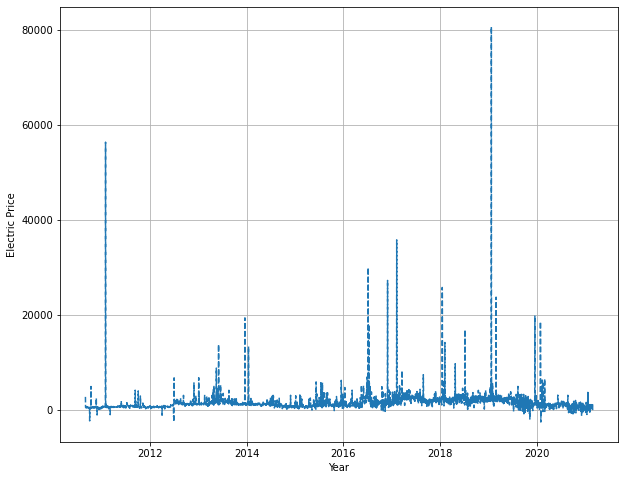

In [9]:
#plot of the daily global_active_power over time
plt.figure(figsize=(10,8))
plt.plot(daily_df.index, daily_df['ElecPrice'], '--')
plt.grid()
plt.xlabel('Year')
plt.ylabel('Electric Price');

Q.12: Using the Augmented Dicky Fuller test (ADF), what is the P-value of the SysLoad and GasPrice of the resampled Data set, to 6 decimal places?

In [10]:
# Perform ADF test on SysLoad and GasPrice columns
for col in ['SysLoad', 'GasPrice']:
    result = adfuller(daily_df[col])
    print(f"P-value for {col}: {result[1]:.6f}")

P-value for SysLoad: 0.004254
P-value for GasPrice: 0.045027


Q. 13: Using the Augmented Dicky Fuller test (ADF) what are the 10% and 5% critical values of GasPrice and ElecPrice of the resampled Data set, to 4 decimal places?

In [11]:
# Perform ADF test on GasPrice and ElecPrice columns
for col in ['GasPrice', 'ElecPrice']:
    result = adfuller(daily_df[col])
    print(f'Critical values for {col}:')
    for key, value in result[4].items():
        print(f'\t{key}: {value:.4f}')

Critical values for GasPrice:
	1%: -3.4321
	5%: -2.8623
	10%: -2.5672
Critical values for ElecPrice:
	1%: -3.4321
	5%: -2.8623
	10%: -2.5672


In [12]:
train = daily_df.iloc[:2757,:]
test = daily_df.iloc[2757:,:]

train.reset_index(inplace = True)
print('train shape:', train.shape)
print('test shape:', test.shape)
train.head()


train shape: (2757, 5)
test shape: (1077, 4)


,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [13]:
df_train = train.iloc[:,[0,-1]]
df_train = df_train.rename(columns={"FullDate": "ds", "ElecPrice": "y"})
df_train.head()

,ds,y
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555


In [14]:
test.reset_index(inplace = True)
test.head()
df_test = test.iloc[:,[0,-1]]
df_test = df_test.rename(columns={"FullDate": "ds", "ElecPrice": "y"})
df_test.head()


,ds,y
0,2018-03-20,1833.00
1,2018-03-21,1730.49
2,2018-03-22,2260.55
3,2018-03-23,2138.76
4,2018-03-24,1721.70


In [15]:
# !pip install pystan~=2.14
# !pip install prophet

In [16]:
from prophet import Prophet
uni_model = Prophet()
uni_model.fit(df_train)

forecast_1 = uni_model.predict(df_test) 
forecast_1.head()

13:21:48 - cmdstanpy - INFO - Chain [1] start processing
13:21:48 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,2684.799430,299.610207,4894.255617,2684.799430,2684.799430,-155.229589,-155.229589,-155.229589,9.738301,9.738301,9.738301,-164.967890,-164.967890,-164.967890,0.0,0.0,0.0,2529.569840
1,2018-03-21,2685.595004,355.361814,4968.229005,2685.595004,2685.595004,-2.715794,-2.715794,-2.715794,159.361120,159.361120,159.361120,-162.076914,-162.076914,-162.076914,0.0,0.0,0.0,2682.879210
2,2018-03-22,2686.390579,579.370203,5206.200564,2686.390579,2686.390579,95.496503,95.496503,95.496503,257.118925,257.118925,257.118925,-161.622421,-161.622421,-161.622421,0.0,0.0,0.0,2781.887082
3,2018-03-23,2687.186153,249.709006,5042.175794,2687.186153,2687.186153,-113.162769,-113.162769,-113.162769,50.275969,50.275969,50.275969,-163.438738,-163.438738,-163.438738,0.0,0.0,0.0,2574.023384
4,2018-03-24,2687.981728,-308.325549,4717.742518,2687.981728,2687.981728,-438.737441,-438.737441,-438.737441,-271.453689,-271.453689,-271.453689,-167.283752,-167.283752,-167.283752,0.0,0.0,0.0,2249.244287


Q. 14: Evaluating the results of your time series model on the test set, what is the MAPE (in %) in 2 decimal places?

In [17]:
# Define the MAPE function
def metric(y_true,y_pred):
  y_true,y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred)/y_true)) *100
mape = metric(df_test['y'], forecast_1['yhat'])
print(f'The Mean Average Percentage Error ( MAPE) is: {round(mape, 2)}')

The Mean Average Percentage Error ( MAPE) is: 544.95


Q. 15: What is the RMSE in 2 decimal places?

In [18]:
rmse = np.sqrt(mean_squared_error(df_test['y'], forecast_1['yhat']))
print(f'The Mean Squared Error is: {round(rmse, 2)}')

The Mean Squared Error is: 3208.69


Q.16: If you plot the components from the forecasted model, what month of the yearly seasonality has the highest value?
Answer: July

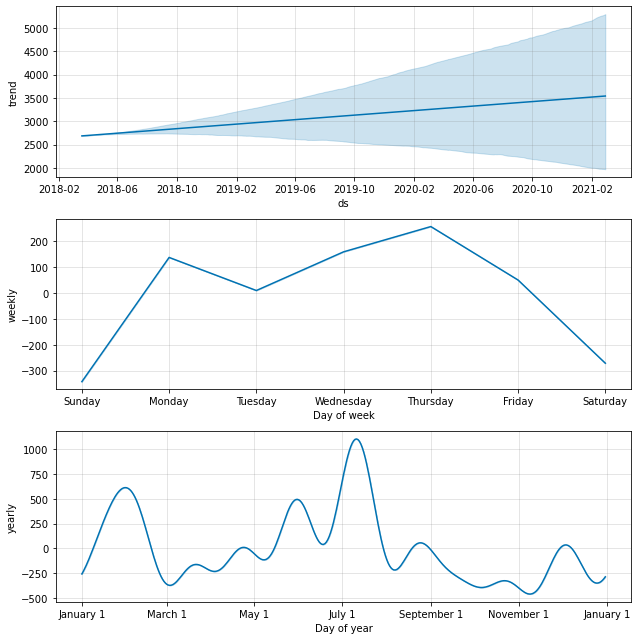

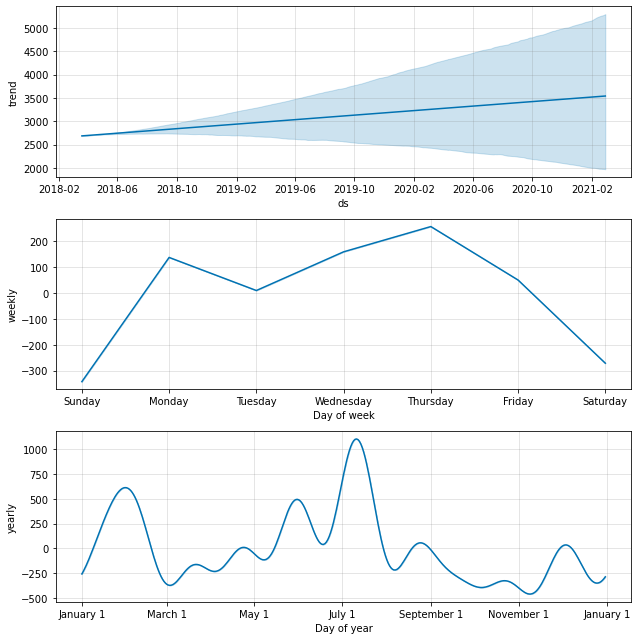

In [19]:
uni_model.plot_components(forecast_1)

In [20]:
daily_df.reset_index(inplace=True)
daily_df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [21]:
##Setting the regression and prediction features for training
daily_df1 = daily_df.rename(columns = {'FullDate':'ds','Tmax':'add2',
                                           'SysLoad':'add1','GasPrice':'add3','ElecPrice':'y'})
daily_df1.head() 

,ds,add2,add1,add3,y
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [22]:
train_1 = daily_df1.iloc[:2757,:]
test_1 = daily_df1.iloc[2757:,:]

multi_model = Prophet()

multi_model.add_regressor('add1')
multi_model.add_regressor('add2')
multi_model.add_regressor('add3')

In [23]:
multi_model.fit(train_1)

13:21:51 - cmdstanpy - INFO - Chain [1] start processing
13:21:52 - cmdstanpy - INFO - Chain [1] done processing


In [24]:
forecast_2 = multi_model.predict(test_1) 
forecast_2.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,add1,add1_lower,add1_upper,add2,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-03-20,1870.009895,-339.500612,4255.189198,1870.009895,1870.009895,-856.675764,-856.675764,-856.675764,0.235827,...,-84.499228,-84.499228,-84.499228,-39.259713,-39.259713,-39.259713,0.0,0.0,0.0,1988.500167
1,2018-03-21,1870.703675,-205.700329,4165.574791,1870.703675,1870.703675,-1026.747918,-1026.747918,-1026.747918,0.233029,...,42.534994,42.534994,42.534994,-29.964775,-29.964775,-29.964775,0.0,0.0,0.0,1979.861241
2,2018-03-22,1871.397454,640.342446,5168.607536,1871.397454,1871.397454,-215.033659,-215.033659,-215.033659,0.219471,...,145.611000,145.611000,145.611000,-24.925666,-24.925666,-24.925666,0.0,0.0,0.0,2900.370838
3,2018-03-23,1872.091234,254.322679,4646.069970,1872.091234,1872.091234,-274.992787,-274.992787,-274.992787,0.211509,...,-44.324251,-44.324251,-44.324251,-24.001000,-24.001000,-24.001000,0.0,0.0,0.0,2584.608469
4,2018-03-24,1872.785014,-789.162955,3684.945393,1872.785014,1872.785014,-1076.810544,-1076.810544,-1076.810544,0.209572,...,-117.530888,-117.530888,-117.530888,-26.940001,-26.940001,-26.940001,0.0,0.0,0.0,1437.598659


Q. 17: Evaluating the results of your time series model on the test set, what is the MAPE (in %) in 2 decimal places?

In [25]:
mape = metric(test_1['y'],forecast_2['yhat'])
print(f'The Mean Average Percentage Error ( MAPE) is:{round(mape, 2)}')

The Mean Average Percentage Error ( MAPE) is:233.05


Q. 18: What is the RMSE in 2 decimal places?

In [26]:
rmse = np.sqrt(mean_squared_error(test_1['y'],forecast_2['yhat']))
print(f'The Root Mean Squared Error (RMSE) is: {round(rmse, 2)}')

The Root Mean Squared Error (RMSE) is: 2708.86


Q. 19: If you plot the components from the multivariate forecasted model, what day of the daily seasonality has the highest value?

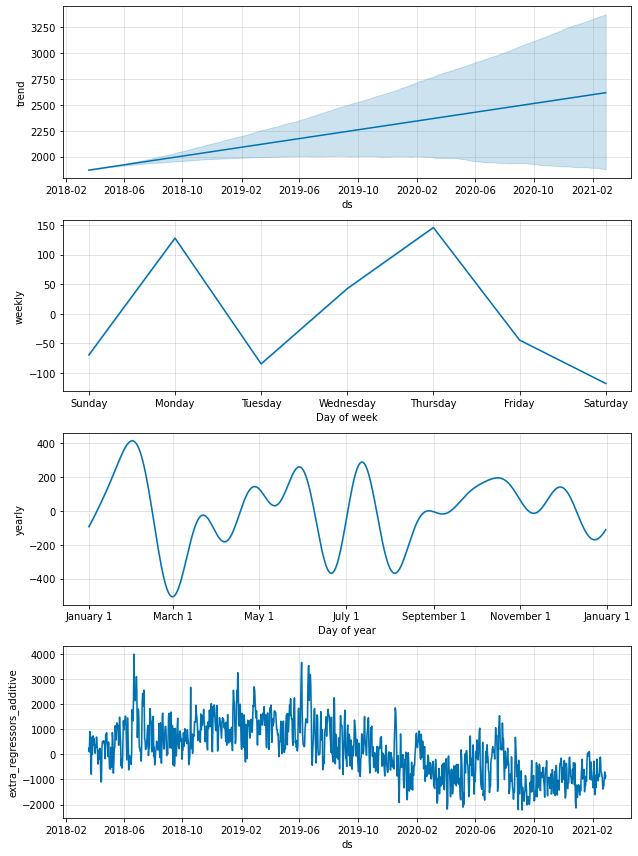

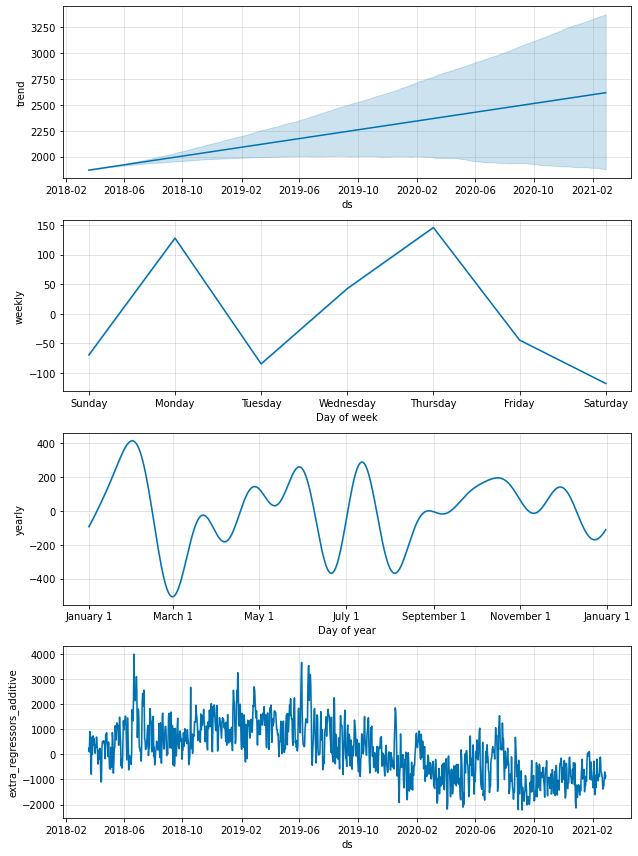

In [27]:
multi_model.plot_components(forecast_2)

Train a multivariate time series model performing the same train test split as before, but now exclude Tmax from the training data(drop Tmax),

In [28]:
train_2 = daily_df.iloc[:2757,:]
test_2 = daily_df.iloc[2757:,:]
daily_df.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [29]:
daily_df2 = daily_df.drop(columns=['Tmax'], inplace=True)
daily_df2 = daily_df.rename(columns = {'FullDate':'ds',
                                       'SysLoad':'add1',
                                       'GasPrice':'add3',
                                       'ElecPrice':'y'})
daily_df2.head() 

,ds,add1,add3,y
0,2010-09-01,41565.380,88.56,2751.700
1,2010-09-02,38898.990,88.56,570.810
2,2010-09-03,41665.760,106.80,504.975
3,2010-09-04,35638.085,81.36,502.275
4,2010-09-05,35611.410,106.80,500.555


In [30]:
df_train_2 = daily_df2.iloc[:2757,:]
df_test_2 = daily_df2.iloc[2757:,:]

In [31]:
# Create multivariate model without `Tmax'
multi_model = Prophet()
multi_model.add_regressor('add1')
multi_model.add_regressor('add3')
multi_model.fit(df_train_2)
forecast_3 = multi_model.predict(df_test_2)

13:21:54 - cmdstanpy - INFO - Chain [1] start processing
13:21:55 - cmdstanpy - INFO - Chain [1] done processing


Q. 20: What is the mean absolute percentage error (MAPE) to 2 decimal places on the test set?

In [32]:
mape = metric(df_test_2['y'], forecast_3['yhat'])
print(f'The Mean Average Percentage Error (MAPE) is:{round(mape, 2)}')

The Mean Average Percentage Error (MAPE) is:232.97
